# Dataset proposal for Diamond Beach

Honour Booth, Madeline Davis, Christy Chock
12/16/2022 OCN 682

This dataset was collected as clean and tidy. The flow is as follows:
1. undtidying and uncleaning the data
2. recleaning and retidying the data
3. initial data analysis
4. linear mixed models
5. visualization of the models


In [295]:
# Loading packages used here
my_packages <- c("tidyverse", "lme4", "nlme", "readxl", "lmerTest", "dplyr", "ggplot2", "gridExtra", "cowplot")

In [222]:
lapply(my_packages, require, character.only = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

# Cleaning and tidying

This includes untidying and retidying of our data set

In [223]:
# Untidy people portion of dataset

In [224]:
# List excel sheets
combined_data <- excel_sheets("2_People_untidy_MD.xlsx") %>% map_df(~read_xlsx("2_People_untidy_MD.xlsx",.))

In [225]:
# Replace missing values with 0
combined_data[is.na(combined_data)] <- 0

In [226]:
# Divide People_total / msq to get total ppl_msq
combined_data$ppl_msq <- (combined_data$People_total / combined_data$msq)

In [227]:
# Untidy moon phase / concentration data

In [228]:
# All BP3 and OC concentration ([UVF]) data from individual CSV files; str preview showing NA values
conc_muku <- data.frame(read.csv("conc_muku.csv"))
conc_ole <- data.frame(read.csv("conc_ole.csv"))
conc_hoku <- data.frame(read.csv("conc_hoku.csv"))
str(conc_muku)
str(conc_ole)
str(conc_hoku)

'data.frame':	30 obs. of  4 variables:
 $ Moon: chr  "Muku" "Muku" "Muku" "Muku" ...
 $ Time: int  0 0 0 4 4 4 8 8 8 9 ...
 $ BP3 : num  12.3 13.9 11.1 20 20.1 ...
 $ OC  : num  NA NA NA NA NA ...
'data.frame':	30 obs. of  4 variables:
 $ Moon: chr  "ʻOlekūkolu" "ʻOlekūkolu" "ʻOlekūkolu" "ʻOlekūkolu" ...
 $ Time: int  0 0 0 4 4 4 8 8 8 9 ...
 $ BP3 : num  21.2 21.5 19.3 20.3 21.7 ...
 $ OC  : num  NA NA NA 15.6 12.8 ...
'data.frame':	30 obs. of  4 variables:
 $ Moon: chr  "Hoku" "Hoku" "Hoku" "Hoku" ...
 $ Time: int  0 0 0 4 4 4 8 8 8 9 ...
 $ BP3 : num  36.9 35.1 35.9 36.6 37.1 ...
 $ OC  : num  87.4 73.7 71 84.2 109.1 ...


In [229]:
# Combine all [UVF] data to one data frame
conc <- rbind(conc_muku, conc_ole, conc_hoku)

In [230]:
# Replace NA values with 0; str preview
conc[is.na(conc)] <- 0
str(conc)

'data.frame':	90 obs. of  4 variables:
 $ Moon: chr  "Muku" "Muku" "Muku" "Muku" ...
 $ Time: int  0 0 0 4 4 4 8 8 8 9 ...
 $ BP3 : num  12.3 13.9 11.1 20 20.1 ...
 $ OC  : num  0 0 0 0 0 ...


In [231]:
# Combine [UVF] and pple from combined_data; head preview
conc_pple <- cbind(conc,combined_data)

In [232]:
# Remove duplicate columns, reorganize columns; head preview
conc_pple_2 <- conc_pple[,-5]
conc_pple_3 <- conc_pple_2[,-8]
conc_pple_4 <- conc_pple_3[,-6]
conc_pple_fin <- conc_pple_4 %>% relocate(Date, .after = Moon)
head(conc_pple_fin)

,Moon,Date,Time,BP3,OC,People_total,ppl_msq
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Muku,20220628,0,12.34324,0,0,0
2,Muku,20220628,0,13.92103,0,0,0
3,Muku,20220628,0,11.11400,0,0,0
4,Muku,20220628,4,20.03424,0,0,0
5,Muku,20220628,4,20.05967,0,0,0
6,Muku,20220628,4,18.89155,0,0,0


In [233]:
# Uncombine and recombine post and pre tide numbers

In [234]:
# Kaimana_tide dataset
Diamond_data <- read.csv("Diamond_tide.csv")
str(Diamond_data)

'data.frame':	90 obs. of  6 variables:
 $ Date    : int  20220628 20220628 20220628 20220628 20220628 20220628 20220628 20220628 20220628 20220628 ...
 $ Moon    : chr  "Muku" "Muku" "Muku" "Muku" ...
 $ Time    : num  0 0 0 4 4 4 8 8 8 9 ...
 $ Tide    : num  0.271 0.271 0.271 0.505 0.505 ...
 $ PreTide : num  0.24 0.24 0.24 0.54 0.54 0.54 0.54 0.54 0.54 -0.15 ...
 $ PostTide: num  0.54 0.54 0.54 -0.15 -0.15 -0.15 -0.15 -0.15 -0.15 2.28 ...


In [235]:
# Combining PreTide and PostTide columns into one
Diamond_data$PreTide_PostTide <- paste(Diamond_data$PreTide, Diamond_data$PostTide, sep="_")
str(Diamond_data)

'data.frame':	90 obs. of  7 variables:
 $ Date            : int  20220628 20220628 20220628 20220628 20220628 20220628 20220628 20220628 20220628 20220628 ...
 $ Moon            : chr  "Muku" "Muku" "Muku" "Muku" ...
 $ Time            : num  0 0 0 4 4 4 8 8 8 9 ...
 $ Tide            : num  0.271 0.271 0.271 0.505 0.505 ...
 $ PreTide         : num  0.24 0.24 0.24 0.54 0.54 0.54 0.54 0.54 0.54 -0.15 ...
 $ PostTide        : num  0.54 0.54 0.54 -0.15 -0.15 -0.15 -0.15 -0.15 -0.15 2.28 ...
 $ PreTide_PostTide: chr  "0.24_0.54" "0.24_0.54" "0.24_0.54" "0.54_-0.15" ...


In [236]:
# Removing old columns
# Download this one as csv
tide <- Diamond_data[c("Date", "Moon", "Time", "Tide", "PreTide_PostTide")]

In [237]:
# Tidying up the data again (Cleaning)
tide[c('PreTide', 'PostTide')] <- str_split_fixed(tide$PreTide_PostTide, '_', 2)

In [238]:
# Removing extra joint column (Cleaning)
tide_2 <- tide[c("Date", "Moon", "Time", "Tide", "PreTide", "PostTide")]

In [239]:
# Convert Tide column from inches to meters
tide_2$Tide <- tide_2$Tide * 0.3048

In [240]:
# Changing PreTide and PostTide columns from character to double strings
tide_2$PreTide = as.double(tide_2$PreTide)
tide_2$PostTide = as.double(tide_2$PostTide)

In [241]:
# Convert PreTide and PostTide columns from inches to meters
tide_2$PreTide <- tide_2$PreTide * 0.3048
tide_2$PostTide <- tide_2$PostTide * 0.3048

In [242]:
# Combine [UVF] and pple data with tidal data from tide_2
Diamond_all <- cbind(conc_pple_fin,tide_2)
head(Diamond_all)

,Moon,Date,Time,BP3,OC,People_total,ppl_msq,Date,Moon,Time,Tide,PreTide,PostTide
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Muku,20220628,0,12.34324,0,0,0,20220628,Muku,0,0.08264164,0.073152,0.164592
2,Muku,20220628,0,13.92103,0,0,0,20220628,Muku,0,0.08264164,0.073152,0.164592
3,Muku,20220628,0,11.11400,0,0,0,20220628,Muku,0,0.08264164,0.073152,0.164592
4,Muku,20220628,4,20.03424,0,0,0,20220628,Muku,4,0.15407579,0.164592,-0.045720
5,Muku,20220628,4,20.05967,0,0,0,20220628,Muku,4,0.15407579,0.164592,-0.045720
6,Muku,20220628,4,18.89155,0,0,0,20220628,Muku,4,0.15407579,0.164592,-0.045720


In [243]:
# Remove duplicate columns
Diamond_all_1 <- Diamond_all[,-10]
Diamond_all_2 <- Diamond_all_1[,-9]
Diamond_all_fin <- Diamond_all_2[,-8]

In [244]:
# Complete clean and tidy data set

In [245]:
str(Diamond_all_fin)

'data.frame':	90 obs. of  10 variables:
 $ Moon        : chr  "Muku" "Muku" "Muku" "Muku" ...
 $ Date        : num  20220628 20220628 20220628 20220628 20220628 ...
 $ Time        : int  0 0 0 4 4 4 8 8 8 9 ...
 $ BP3         : num  12.3 13.9 11.1 20 20.1 ...
 $ OC          : num  0 0 0 0 0 ...
 $ People_total: num  0 0 0 0 0 0 9 9 9 11 ...
 $ ppl_msq     : num  0 0 0 0 0 ...
 $ Tide        : num  0.0826 0.0826 0.0826 0.1541 0.1541 ...
 $ PreTide     : num  0.0732 0.0732 0.0732 0.1646 0.1646 ...
 $ PostTide    : num  0.1646 0.1646 0.1646 -0.0457 -0.0457 ...


In [246]:
# Export finished tidy csv file
write.csv(Diamond_all_fin, "DiamondBeach_all.csv")

# Exploratory data analysis

Here is our initial assessment of variations between the values. The modeling and bootstrapping of this data set can be found under this same repository under: FINAL.PROJECT.Diamond.Beach.

In [247]:
### loading libraries
library(ggpubr)
library(tidyverse)
library(ggplot2)
library(gridExtra)

In [248]:
### DiamondBeach_all Dataset
DiamondBeach_data <- read.csv("DiamondBeach_all.csv")

In [249]:
### Making Muku (New Moon)phase dataframe
Muku <-head(DiamondBeach_data, n=30)

In [250]:
### Making Muku (New Moon) and Number of People dataframe
Muku_people<-Muku[, c("Time","People_total")]

In [251]:
### Plotting Muku (New Moon) vs. Number of People
Muku.ppl <- ggplot(Muku_people, aes(Time, People_total)) + 
geom_bar(position = "dodge",
           stat = "summary",
           fun = "mean", fill = "blue")+
    labs(x ="Muku (New Moon)", y = "Number of People")

In [252]:
### Making 'Olekukolu (Half Moon) phase dataframe
Olekukolu <-DiamondBeach_data[31:60,] 

In [253]:
### Making 'Olekukolu (Half Moon) and Number of People dataframe
Olekukolu_people<-Olekukolu[, c("Time","People_total")]

In [254]:
### Plotting Olekukolu (Half Moon) vs. Number of People
Olekukolu.ppl <- ggplot(Olekukolu_people, aes(Time, People_total)) + 
geom_bar(position = "dodge",
           stat = "summary",
           fun = "mean", fill = "purple") +
    labs(x ="Olekukolu (Half Moon)", y = "")

In [255]:
### Making Hoku (Full Moon) phase dataframe
Hoku <-DiamondBeach_data[61:90,] 

In [256]:
### Making Hoku (Full Moon) and Number of People dataframe
Hoku_people<-Hoku[, c("Time","People_total")]

In [257]:
### Plotting Hoku (Full Moon) vs. Number of People
Hoku.ppl <- ggplot(Hoku_people, aes(Time, People_total)) + 
geom_bar(position = "dodge",
           stat = "summary",
           fun = "mean", fill = "pink") +
    labs(x ="Hoku (Full Moon)", y = "")     

In [258]:
### Making Muku (New Moon) and Tide Height (m) dataframe
Muku_tide<-Muku[, c("Time","Tide")]

In [259]:
### Plotting Muku (New Moon) vs. Tide Height (m)
Muku.tide <- ggplot(data = Muku_tide) +
    geom_line(aes(x = Time, y = Tide),color = "green", size = 2)+
    labs(x = "", y = "Tide Height (m)") 

In [260]:
### Making 'Olekukolu (Half Moon) and Tide Height (m) dataframe
Olekukolu_tide<-Olekukolu[, c("Time","Tide")]

In [261]:
### Plotting 'Olekukolu (Half Moon) vs. Tide Height (m)
Olekukolu.tide <- ggplot(data = Olekukolu_tide) +
    geom_line(aes(x = Time, y = Tide),color = "orange", size = 2)+
    labs(x = "", y = "") 

In [262]:
### Making Hoku (Full Moon) and Tide Height (m) dataframe
Hoku_tide<-Hoku[, c("Time","Tide")]

In [263]:
### Plotting Hoku (Full Moon) vs. Tide Height (m)
Hoku.tide <- ggplot(data = Hoku_tide) +
    geom_line(aes(x = Time, y = Tide),color = "yellow", size = 2)+
    labs(x = "", y = "") 

In [264]:
### Making Muku (New Moon) and BP3 dataframe
Muku_BP3<-Muku[, c("Time","BP3")]

In [265]:
### Plotting Muku (New Moon) vs. BP3 replicates (mg/L)
Muku.vs.BP3.replicates <- ggplot(data = Muku_BP3) +
    geom_point(aes(x = Time, y = BP3),color = "red", size = 4)+
    labs(x = "", y = "BP3 (mg/L)")

In [266]:
### Making 'Olekukolu (Half Moon) and Tide Height (m) dataframe
Olekukolu_BP3<-Olekukolu[, c("Time","BP3")]

In [267]:
### Plotting 'Olekukolu (Half Moon) vs. BP3 replicates (mg/L)
Olekukolu.vs.BP3.replicates <- ggplot(data = Olekukolu_BP3) +
    geom_point(aes(x = Time, y = BP3),color = "cyan", size = 4)+
    labs(x = "",y = "") 

In [268]:
### Making Hoku (Full Moon) and BP3 dataframe
Hoku_BP3<-Hoku[, c("Time","BP3")]

In [269]:
### Plotting Hoku (Full Moon) vs. BP3 replicates (mg/L)
Hoku.vs.BP3.replicates <- ggplot(data = Hoku_BP3) +
    geom_point(aes(x = Time, y = BP3),color = "brown", size = 4)+
    labs(x = "",y = "") 

In [270]:
### Making Muku (New Moon) and OC dataframe
Muku_OC<-Muku[, c("Time","OC")]

In [271]:
### Plotting Muku (New Moon) vs. OC replicates (mg/L)
Muku.vs.OC.replicates <- ggplot(data = Muku_OC) +
    geom_point(aes(x = Time, y = OC),color = "gold", size = 4)+
    labs(x = "",y = "OC (mg/L)") 

In [272]:
### Making 'Olekukolu (Half Moon) and OC dataframe
Olekukolu_OC<-Muku[, c("Time","OC")]

In [273]:
### Plotting 'Olekukolu (Half Moon) vs. OC replicates (mg/L)
Olekukolu.vs.OC.replicates <- ggplot(data = Olekukolu_OC) +
    geom_point(aes(x = Time, y = OC),color = "dark green", size = 4)+
    labs(x = "",y = "") 

In [274]:
### Making Hoku (Full Moon) and OC dataframe
Hoku_OC<-Hoku[, c("Time","OC")]

In [275]:
### Plotting Hoku (Full Moon) vs. OC replicates (mg/L)
Hoku.vs.OC.replicates <- ggplot(data = Hoku_OC) +
    geom_point(aes(x = Time, y = OC),color = "deepskyblue", size = 4)+
    labs(x = "",y = "") 

In [276]:
### Calculate the BP3 mean for Muku values
BP3_mean <- tapply(Muku_BP3$BP3,Muku_BP3$Time,mean)

In [277]:
#data.frame(BP3_mean for Muku (New Moon))
Time_data <- c(0,4,8,9,10,11,12,13,14,15,16,17,18,19,20,24)
Time <- as.integer(Time_data)
combined_BP3_mean <- cbind(Time,BP3_mean)
head(data.frame(combined_BP3_mean))

,Time,BP3_mean
,<dbl>,<dbl>
0,0,12.45942
4,4,19.66182
8,8,13.49042
9,9,0.00000
10,10,0.00000
11,11,0.00000


In [278]:
### Plotting Muku (New Moon) vs. BP3 mean (mg/L)
Muku.vs.BP3.mean <- qplot(Time, BP3_mean,  xlab = "Muku (New Moon)",
      ylab = "BP3 mean (mg/L)",
      main = "Muku (New Moon) vs. BP3 mean",
      size = I(4), color = "BP3 mean_Muku")

In [279]:
### Calculate the OC mean for 'Olekukolu (Half Moon) values
Olekukolu_mean <- tapply(Olekukolu_OC$OC,Olekukolu_OC$Time,mean)

In [280]:
#data.frame(BP3_mean for 'Olekukolu (Half Moon))
Time_BP3_mean <- c(0,4,8,9,10,11,12,13,14,15,16,17,18,19,20,24)
Time <- as.integer(Time_BP3_mean)
combined_Olekukolu_mean <- cbind(Time,Olekukolu_mean)
head(data.frame(combined_Olekukolu_mean))

,Time,Olekukolu_mean
,<dbl>,<dbl>
0,0,0.00000
4,4,0.00000
8,8,81.68983
9,9,0.00000
10,10,0.00000
11,11,0.00000


In [281]:
### Plotting 'Olekukolu (Half Moon) vs. BP3 mean (mg/L)
Olekukolu.vs.BP3.mean <- qplot(Time, Olekukolu_mean,  xlab = "Olekukolu (Half Moon)",
      ylab = "BP3 mean (mg/L)",
      main = "Plot 8.3 (Olekukolu (Half Moon) vs. BP3 mean)",
      size = I(4), color = "BP3 mean_Olekukolu")

In [282]:
### Calculate the BP3 mean for Hoku (Full Moon) values
Hoku_mean <- tapply(Hoku_BP3$BP3,Hoku_BP3$Time,mean)

In [283]:
#data.frame(BP3_mean for Hoku (Full Moon))
Time_BP3_mean <- c(0,4,8,9,10,11,12,13,14,15,16,17,18,19,20,24)
Time <- as.integer(Time_BP3_mean)
combined_Hoku_mean <- cbind(Time,Hoku_mean)
head(data.frame(combined_Hoku_mean))

,Time,Hoku_mean
,<dbl>,<dbl>
0,0,35.97264
4,4,36.14388
8,8,43.43318
9,9,0.00000
10,10,0.00000
11,11,0.00000


In [284]:
### Plotting Hoku (Full Moon) vs. BP3 mean (mg/L)
Hoku.vs.BP3.mean <- qplot(Time, Hoku_mean,  xlab = "Hoku (Full Moon)",
      ylab = "BP3 mean (mg/L)",
      main = "Plot 9.3 (Hoku (Full Moon) vs. BP3 mean)",
      size = I(4), color = "BP3 mean_Hoku")

In [285]:
### Calculate the OC mean for Muku (New Moon) values
OC_mean <- tapply(Muku_OC$OC,Muku_OC$Time,mean)

In [286]:
#data.frame(OC_mean) for Muku (New Moon) values
Time_OC_mean <- c(0,4,8,9,10,11,12,13,14,15,16,17,18,19,20,24)
Time <- as.integer(Time_OC_mean)
combined_OC_mean <- cbind(Time,OC_mean)
head(data.frame(combined_OC_mean))

,Time,OC_mean
,<dbl>,<dbl>
0,0,0.00000
4,4,0.00000
8,8,81.68983
9,9,0.00000
10,10,0.00000
11,11,0.00000


In [287]:
### Plotting Muku (New Moon) vs. OC mean (mg/L)
Muku.vs.OC.mean <- qplot(Time, OC_mean,  xlab = "Muku (New Moon)",
      ylab = "OC mean (mg/L)",
      main = "Plot 7.4 (Muku (New Moon) vs. OC mean)",
      size = I(4), color = "OC mean_Muku")

In [288]:
### Calculate the OC mean for 'Olekukolu (Half Moon) values
OC_mean <- tapply(Olekukolu_OC$OC,Olekukolu_OC$Time,mean)

In [289]:
#data.frame(OC_mean) for 'Olekukolu (Half Moon) values
Time_OC_mean <- c(0,4,8,9,10,11,12,13,14,15,16,17,18,19,20,24)
Time <- as.integer(Time_OC_mean)
combined_OC_mean <- cbind(Time,OC_mean)
head(data.frame(combined_OC_mean))

,Time,OC_mean
,<dbl>,<dbl>
0,0,0.00000
4,4,0.00000
8,8,81.68983
9,9,0.00000
10,10,0.00000
11,11,0.00000


In [290]:
### Plotting 'Olekukolu (Half Moon) vs. OC mean (mg/L)
Olekukolu.vs.OC.mean <- qplot(Time, OC_mean,  xlab = "'Olekukolu (Half Moon)",
      ylab = "OC mean (mg/L)",
      main = "'Olekukolu (Half Moon) vs. OC mean",
      size = I(4), color = "OC mean_'Olekukolu")

In [291]:
### Calculate the OC mean for Hoku (Full Moon) values
OC_mean <- tapply(Hoku_OC$OC,Hoku_OC$Time,mean)

In [292]:
#data.frame(OC_mean) for Hoku (Full Moon) values
Time_OC_mean <- c(0,4,8,9,10,11,12,13,14,15,16,17,18,19,20,24)
Time <- as.integer(Time_OC_mean)
combined_OC_mean <- cbind(Time,OC_mean)
head(data.frame(combined_OC_mean))

,Time,OC_mean
,<dbl>,<dbl>
0,0,77.35726
4,4,93.13995
8,8,87.05138
9,9,0.00000
10,10,0.00000
11,11,0.00000


In [293]:
### Plotting Hoku (Full Moon) vs. OC mean (mg/L)
Hoku.vs.OC.mean <- qplot(Time, OC_mean,  xlab = "Hoku (Full Moon)",
      ylab = "BP3 mean (mg/L)",
      main = "Hoku (Full Moon) vs. OC mean",
      size = I(4), color = "OC mean_Hoku")

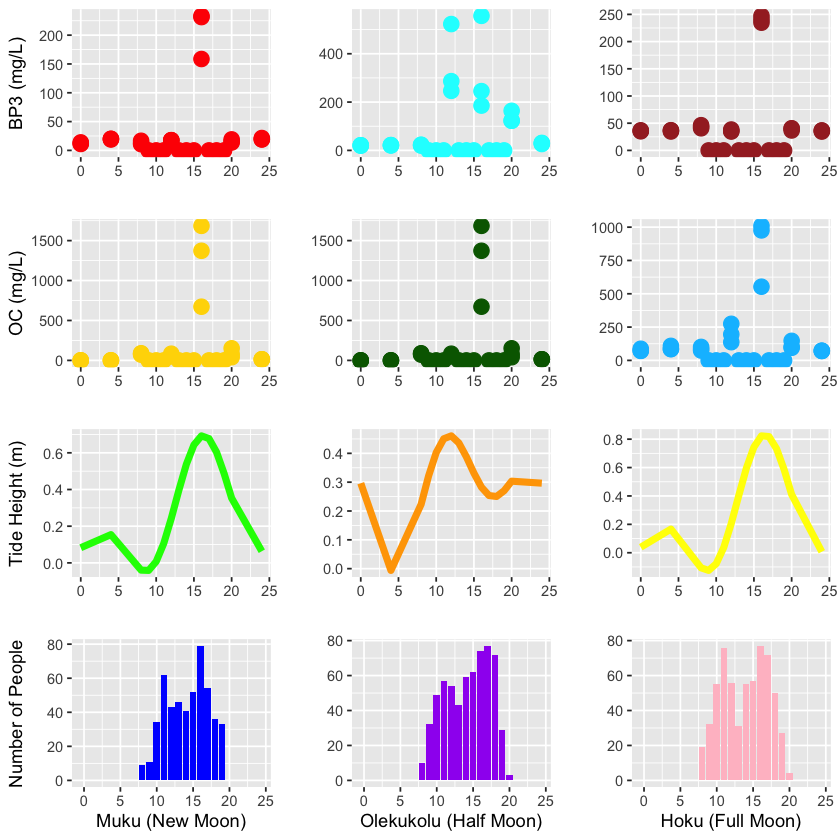

In [294]:
# Arranging Concentration, Tide, and People per area as tiled graphs 
plot_grid(Muku.vs.BP3.replicates, Olekukolu.vs.BP3.replicates, Hoku.vs.BP3.replicates,
          Muku.vs.OC.replicates, Olekukolu.vs.OC.replicates, Hoku.vs.OC.replicates,
    Muku.tide, Olekukolu.tide, Hoku.tide, 
         Muku.ppl, Olekukolu.ppl, Hoku.ppl, align = "hv", nrow = 4)